In [5]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,lyrics,artist_name
The Beatles,it be twenty year ago today sergeant pepper ta...,The Beatles
The Rolling Stones,oh yeah i hear you talk when im on the street ...,The Rolling Stones
Elton John,the rose in the window box have tilt to one si...,Elton John
Mariah Carey,oh now you can have me when you want me you si...,Mariah Carey
Madonna,life be a mystery everyone must stand alone i ...,Madonna
Michael Jackson,i say you wan na be startin somethin you get t...,Michael Jackson
Taylor Swift,there somethin bout the way the street look wh...,Taylor Swift
Stevie Wonder,spoken by sw when you say that you kill in the...,Stevie Wonder
Whitney Houston,i found out what ive be miss always on the run...,Whitney Houston
Elvis Presley,well it one for the money two for the show thr...,Elvis Presley


In [6]:
#top 10 words for each artist
top_words_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(10)
    top_words_dict[c]= list(zip(top.index, top.values))

top_words_dict

{'The Beatles': [('come', 45),
  ('want', 33),
  ('know', 30),
  ('sun', 29),
  ('love', 22),
  ('time', 22),
  ('say', 19),
  ('make', 18),
  ('sky', 18),
  ('bad', 17)],
 'The Rolling Stones': [('baby', 61),
  ('come', 61),
  ('let', 52),
  ('want', 43),
  ('away', 33),
  ('need', 30),
  ('happy', 29),
  ('love', 28),
  ('roll', 25),
  ('right', 24)],
 'Elton John': [('saturday', 36),
  ('tell', 27),
  ('love', 26),
  ('say', 25),
  ('life', 23),
  ('know', 22),
  ('meal', 21),
  ('old', 21),
  ('time', 20),
  ('ticket', 19)],
 'Mariah Carey': [('baby', 97),
  ('feel', 54),
  ('fly', 45),
  ('away', 44),
  ('know', 44),
  ('time', 43),
  ('butterfly', 39),
  ('want', 38),
  ('love', 38),
  ('sweet', 37)],
 'Madonna': [('love', 86),
  ('make', 35),
  ('want', 33),
  ('feel', 32),
  ('heart', 31),
  ('know', 28),
  ('say', 25),
  ('candy', 24),
  ('life', 23),
  ('eye', 23)],
 'Michael Jackson': [('love', 91),
  ('know', 82),
  ('baby', 80),
  ('girl', 77),
  ('say', 69),
  ('really', 

In [11]:
from sklearn.feature_extraction import text 

new_stop_words = ['aaah', 'aah', 'aaow', 'laa', 'ooh', 'ba', 'do', 'dodo', 'just', 'dont', 'gonna', 'bit', 'oh', 'im', 'like', 'little', 'cause', 'way',
                 'youre', 'youll', 'yeah', 'dont', 'gon', 'wanna', 'na', 'somethin', 'something',
                 'ill', 'ive', 'youve', 'thats', 'shes', 'aint', 'know', 'la', 'getting', 'got', 'theyve']

stop_words = text.ENGLISH_STOP_WORDS.union(new_stop_words)

from wordcloud import WordCloud

wc = WordCloud(collocations=False, stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

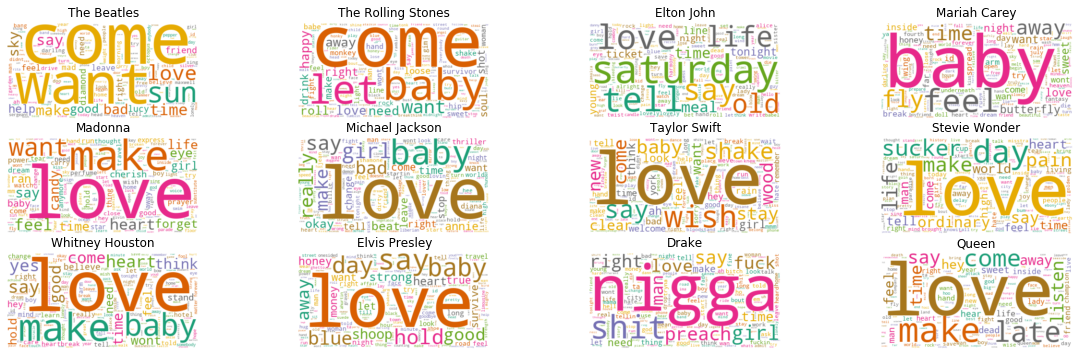

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 6]

artists_names =  ['The Beatles', 'The Rolling Stones', 'Elton John', 'Mariah Carey', 'Madonna', 'Michael Jackson', 'Taylor Swift', 'Stevie Wonder', 'Whitney Houston', 'Elvis Presley', 'Drake', 'Queen']

for index, artist in enumerate(data.columns):
    wc.generate(data_clean.lyrics[artist])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(artists_names[index])
    
plt.show()

In [13]:
#Vocabulary analysis - Number of unique words for each artist
uq_words = []
for artist in data.columns:
    uq_words.append((data[artist] != 0).sum())
uq_words

[671, 792, 947, 673, 590, 624, 730, 871, 510, 446, 1675, 737]

In [14]:
uq_words_df = pd.DataFrame(list(zip(artists_names, uq_words)), columns = ['Artist', 'Unique Words'])
uq_words_df.sort_values(by=['Unique Words'], ascending = False)

,Artist,Unique Words
10,Drake,1675
2,Elton John,947
7,Stevie Wonder,871
1,The Rolling Stones,792
11,Queen,737
6,Taylor Swift,730
3,Mariah Carey,673
0,The Beatles,671
5,Michael Jackson,624
4,Madonna,590


In [15]:
#Bigrams

from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

data = pd.read_pickle('data_clean_NL.pkl')
data

,lyrics,artist_name
The Beatles,it was twenty years ago today sergeant pepper ...,The Beatles
The Rolling Stones,oh yeah i hear you talking when im on the stre...,The Rolling Stones
Elton John,the roses in the window box have tilted to one...,Elton John
Mariah Carey,oh now you can have me when you want me you si...,Mariah Carey
Madonna,life is a mystery everyone must stand alone i ...,Madonna
Michael Jackson,i said you wanna be startin somethin you got t...,Michael Jackson
Taylor Swift,theres somethin bout the way the street looks ...,Taylor Swift
Stevie Wonder,spoken by sw when you say that you kill in the...,Stevie Wonder
Whitney Houston,i found out what ive been missing always on th...,Whitney Houston
Elvis Presley,well its one for the money two for the show th...,Elvis Presley


In [16]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction import text 

stop_words = ['hey', 'aaah', 'aah', 'aaow', 'laa', 'ooh', 'ba', 'do', 'dodo', 'oh', 'yeah', 'na',
               'oo', 'hoo', 'la', 'laa']

bigrams_dict = {}
for data_tuple in data.itertuples(): 
    word_list = nltk.word_tokenize(data_tuple.lyrics)
    lyrics = [word for word in word_list if word not in stop_words]
    finder = BigramCollocationFinder.from_words(lyrics)
    bigrams_dict[data_tuple.artist_name] = list(finder.nbest(BigramAssocMeasures.likelihood_ratio, 10))

In [17]:
bigrams_dict

{'The Beatles': [('i', 'want'),
  ('my', 'friends'),
  ('help', 'from'),
  ('little', 'help'),
  ('come', 'together'),
  ('with', 'diamonds'),
  ('in', 'the'),
  ('want', 'you'),
  ('sky', 'with'),
  ('lucy', 'in')],
 'The Rolling Stones': [('let', 'it'),
  ('soul', 'survivor'),
  ('shot', 'away'),
  ('get', 'what'),
  ('little', 'drink'),
  ('loose', 'let'),
  ('me', 'happy'),
  ('come', 'on'),
  ('its', 'just'),
  ('cant', 'always')],
 'Elton John': [('meal', 'ticket'),
  ('saturday', 'saturday'),
  ('lovelylovely', 'lovelylovely'),
  ('in', 'the'),
  ('cant', 'twist'),
  ('bet', 'she'),
  ('ive', 'seen'),
  ('sister', 'cant'),
  ('saturday', 'nights'),
  ('your', 'sister')],
 'Mariah Carey': [('always', 'be'),
  ('spread', 'your'),
  ('your', 'wings'),
  ('wan', 'be'),
  ('beautiful', 'ones'),
  ('youll', 'always'),
  ('far', 'away'),
  ('baby', 'doll'),
  ('baby', 'baby'),
  ('will', 'always')],
 'Madonna': [('like', 'a'),
  ('candy', 'perfume'),
  ('just', 'like'),
  ('perfume', '

In [18]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
import nltk
from nltk.tokenize import word_tokenize

trigrams_dict = {}
for data_tuple in data.itertuples(): 
    word_list = nltk.word_tokenize(data_tuple.lyrics)
    lyrics = [word for word in word_list if word not in stop_words]
    finder = TrigramCollocationFinder.from_words(lyrics)
    trigrams_dict[data_tuple.artist_name] = list(finder.nbest(TrigramAssocMeasures.likelihood_ratio, 10))

In [19]:
trigrams_dict

{'The Beatles': [('sky', 'with', 'diamonds'),
  ('i', 'want', 'you'),
  ('little', 'help', 'from'),
  ('from', 'my', 'friends'),
  ('in', 'the', 'sky'),
  ('lucy', 'in', 'the'),
  ('help', 'from', 'my'),
  ('a', 'little', 'help'),
  ('driving', 'me', 'mad'),
  ('its', 'getting', 'better')],
 'The Rolling Stones': [('let', 'it', 'loose'),
  ('loose', 'let', 'it'),
  ('let', 'it', 'all'),
  ('down', 'let', 'it'),
  ('keep', 'me', 'happy'),
  ('let', 'it', 'steal'),
  ('ah', 'let', 'it'),
  ('rider', 'let', 'it'),
  ('plays', 'let', 'it'),
  ('you', 'let', 'it')],
 'Elton John': [('saturday', 'saturday', 'saturday'),
  ('lovelylovely', 'lovelylovely', 'lovelylovely'),
  ('saturday', 'saturday', 'nights'),
  ('a', 'meal', 'ticket'),
  ('meal', 'ticket', 'meal'),
  ('ticket', 'meal', 'ticket'),
  ('meal', 'ticket', 'does'),
  ('sister', 'cant', 'twist'),
  ('meal', 'ticket', 'feel'),
  ('meal', 'ticket', 'to')],
 'Mariah Carey': [('spread', 'your', 'wings'),
  ('youll', 'always', 'be'),
  (